In [1]:
# load necessary libraries
from IPython.display import Image
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

from xgboost import XGBRegressor

In [2]:
from sklearn import datasets
boston = datasets.load_boston()

In [3]:
# Creating dataframe
df = pd.DataFrame(boston["data"], columns=boston["feature_names"])
df["MedV"] = boston["target"]
df = df.drop(columns = ['B'])
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MedV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [4]:
# Spliting target variable and independent variables
X = df.drop(['MedV'], axis = 1)
y = df['MedV']

In [5]:
# Splitting data for test and train
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 4)

### Multiple Linear Regression

In [6]:
# importing library for Regression Model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [7]:
# Fitting model into the training dat
model.fit(x_train,y_train)

LinearRegression()

In [8]:
# Creating a dataframe for regression coefficients
coefficients = pd.DataFrame([x_train.columns,model.coef_]).T
coefficients = coefficients.rename(columns={0: 'Attribute', 1: 'Coefficients'})
coefficients

,Attribute,Coefficients
0,CRIM,-0.123661
1,ZN,0.0562093
2,INDUS,-0.0194711
3,CHAS,4.86594
4,NOX,-15.4125
5,RM,3.13198
6,AGE,-0.000525108
7,DIS,-1.57289
8,RAD,0.300789
9,TAX,-0.0142511


In [9]:
# Model prediction on train data
y_pred = model.predict(x_train)
y_pred

array([24.50593865, 15.44611584, 25.33988151, 15.11373606, 39.11595172,
       17.05951162, 39.37317207, 16.14602117, 20.66103142, 40.73182535,
       33.40567725, 16.45528328, 11.05859963, 22.32422256, 24.31324625,
       25.08612289, 14.57123732, 28.26814636, 25.186994  , 21.59881271,
       22.37929741, 18.82140661, 13.17827364, 13.18701757, 23.70402531,
       19.98135228, 17.58732208, 41.34309789, 19.55950908, 15.85667783,
       11.73523614, 24.61104358, 24.51521808, 21.29485948, 23.61176243,
       16.43463217, 17.82971227,  5.38594113, 12.39185524, 16.05760186,
       18.03550484, 20.2279859 , 30.33864073,  6.76314827, 12.87095539,
       -2.25599879, 30.26144002,  8.32274505, 11.20599158, 24.96469857,
       18.52392358, 10.66229203, 28.67991474, 23.16519258, 28.76762029,
       19.38910178, 19.32439887, 25.18935942, 28.94182745, 17.44038423,
        9.5613073 , 28.43178731, 28.09980246, 30.15265152, 18.87003228,
       20.33854319, 17.93952413, 12.63801659, 23.390968  , 22.56

In [10]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.7392552026921004
Adjusted R^2: 0.7300794326988607
MAE: 3.1644665924611166
MSE: 19.626477223575435
RMSE: 4.430178012628323


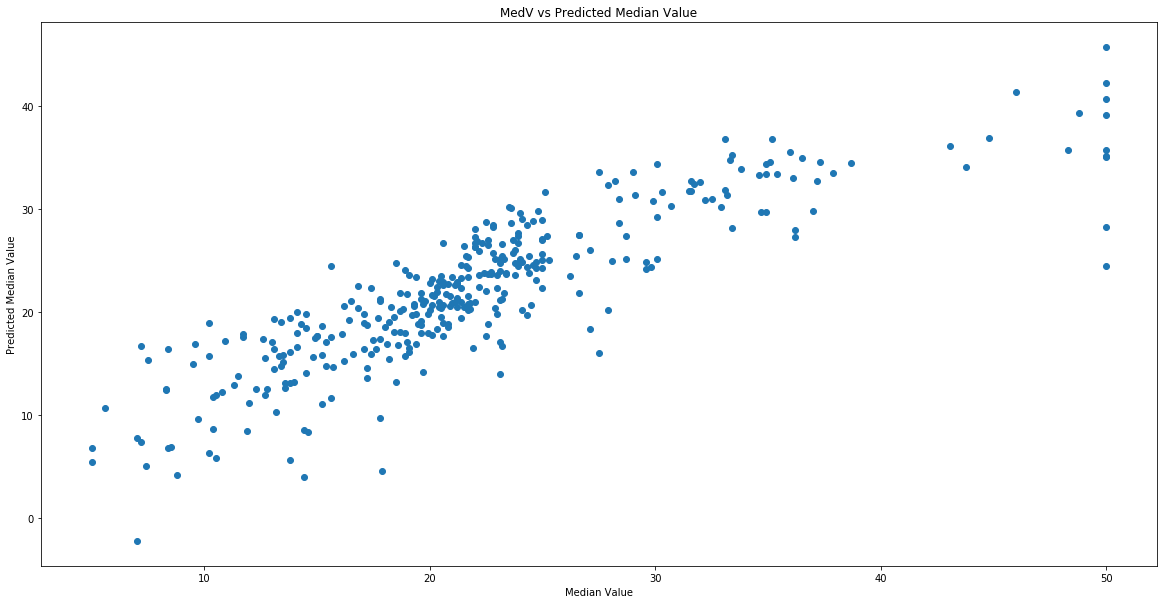

In [11]:
plt.figure(figsize=(20, 10))
plt.scatter(y_train, y_pred)
plt.xlabel("Median Value")
plt.ylabel("Predicted Median Value")
plt.title("MedV vs Predicted Median Value")

plt.savefig('Plot1.png')
plt.show()

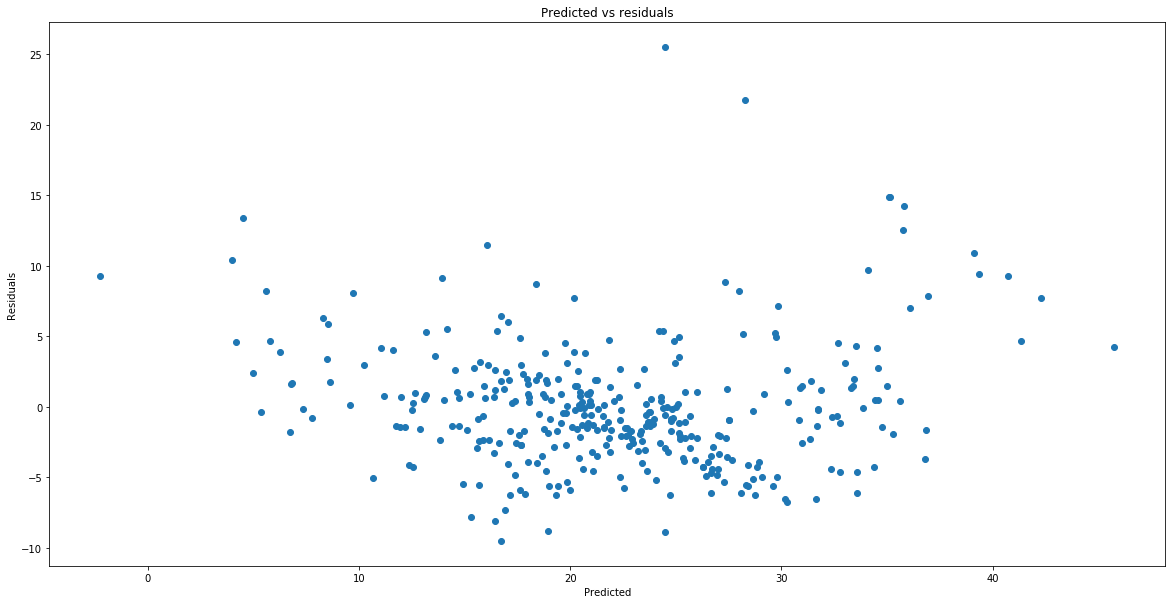

In [12]:
# Checking residuals
plt.figure(figsize=(20, 10))
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.savefig('Plot2.png')
plt.show()

In [13]:
# Predicting Test data with the model
y_test_pred = model.predict(x_test)

In [14]:
# Model Evaluation
acc_linreg = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_linreg)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.7073118203603463
Adjusted R^2: 0.6820437760749086
MAE: 3.9454423316781244
MSE: 30.562520874017476
RMSE: 5.528337984785073


### Decision Tree Regressor

In [15]:
tree = DecisionTreeRegressor()
tree = tree.fit(x_train,y_train)

In [16]:
y_pred = tree.predict(x_train)
y_pred

array([23.9, 18.2, 21.7, 13.5, 50. , 23.1, 48.8, 13.8, 20.1, 50. , 34.9,
        8.4, 15.2, 23. , 24.7, 25.3, 17.2, 50. , 22.9, 20.2, 17.4, 19.5,
       18.5, 14. , 22.6, 14.1, 15.6, 46. , 20.5, 13.5, 10.4, 21.4, 21.6,
       23.2, 23. , 17.6, 16.1,  5. ,  8.3, 27.5, 18.7, 21.7, 30.7,  5. ,
       11.3,  7. , 32.9, 14.6, 12. , 28.1, 18. ,  5.6, 23.6, 24.7, 22.5,
       17.7, 13.1, 23.1, 25. , 14.9,  9.7, 22.8, 22. , 23.6, 14.3, 18.8,
       19.9, 13.6, 19.4, 16.8, 20. , 43.1, 27.9, 20.1, 19. , 19.2, 21.7,
       33.1, 50. , 33.2, 20.1, 21.1,  8.8, 12.3, 14.5, 23.8, 18.7, 21.8,
       21.9, 21.7, 17.1, 23.1, 36.1, 28.2, 11.5, 19. , 22. , 10.5, 21.4,
       16.5, 20.6, 23.3, 23.5, 15. , 26.5, 50. , 10.5, 17.5, 13.6, 17.2,
       19.1, 16.4, 20.6, 20.9, 30.1, 20.7, 22.2, 24.6, 25.2, 37.9, 20.1,
       29.6, 18.7, 23. , 22.9, 24.6, 24.8, 20.8, 22.4, 18.2, 14.4, 23.2,
       13. , 19.7, 21.2, 21.7, 24. , 22. , 20.6, 11.9, 24.3, 23.8, 22.8,
       13.3, 25. , 21. , 20.4, 33.1, 48.3, 14.5, 36

In [17]:
# Model Evaluation
acc_dtr_train = metrics.r2_score(y_train, y_pred)
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 1.0
Adjusted R^2: 1.0
MAE: 0.0
MSE: 0.0
RMSE: 0.0


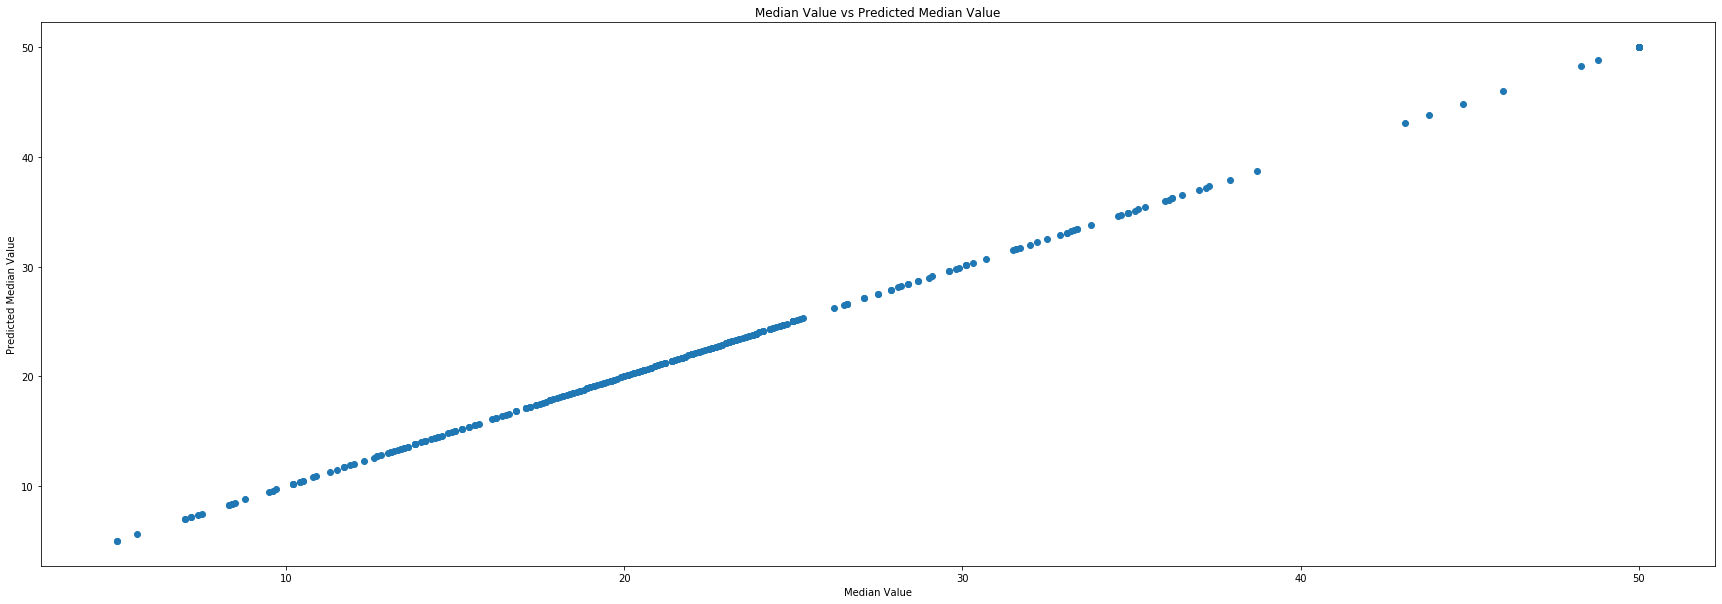

In [18]:
plt.figure(figsize=(30, 10))
plt.scatter(y_train, y_pred)
plt.xlabel("Median Value")
plt.ylabel("Predicted Median Value")
plt.title("Median Value vs Predicted Median Value")
plt.savefig('Plot3.png')
plt.show()

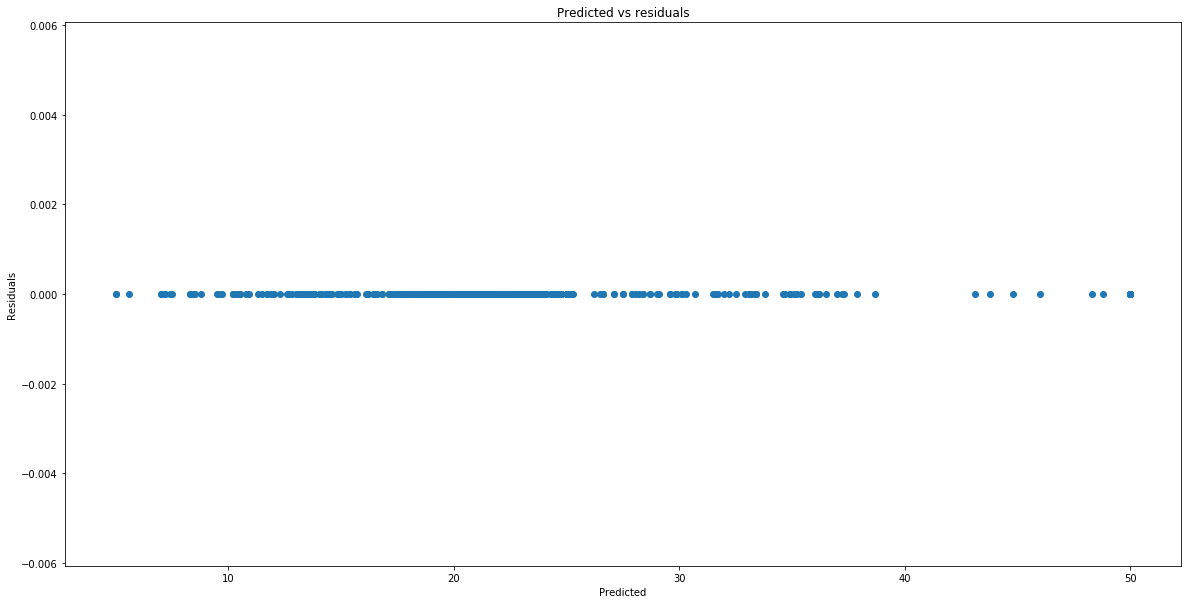

In [19]:
plt.figure(figsize=(20, 10))
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.savefig('Plot4.png')
plt.show()

In [20]:
# Model Evaluation
acc_dtr = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_dtr)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.7073118203603463
Adjusted R^2: 0.6820437760749086
MAE: 3.9454423316781244
MSE: 30.562520874017476
RMSE: 5.528337984785073


### XGBRegressor

In [21]:
#Create a XGBoost Regressor
reg = XGBRegressor()

# Train the model using the training sets 
reg.fit(x_train, y_train)

[15:02:42] WARNING: /usr/local/miniconda/conda-bld/xgboost_1566327371504/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [22]:
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

XGBRegressor(silent=True)

In [23]:
y_pred = reg.predict(x_train)

In [24]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.9681342054874744
Adjusted R^2: 0.9670128285544823
MAE: 1.17831435338252
MSE: 2.3985647908161414
RMSE: 1.5487300574393659


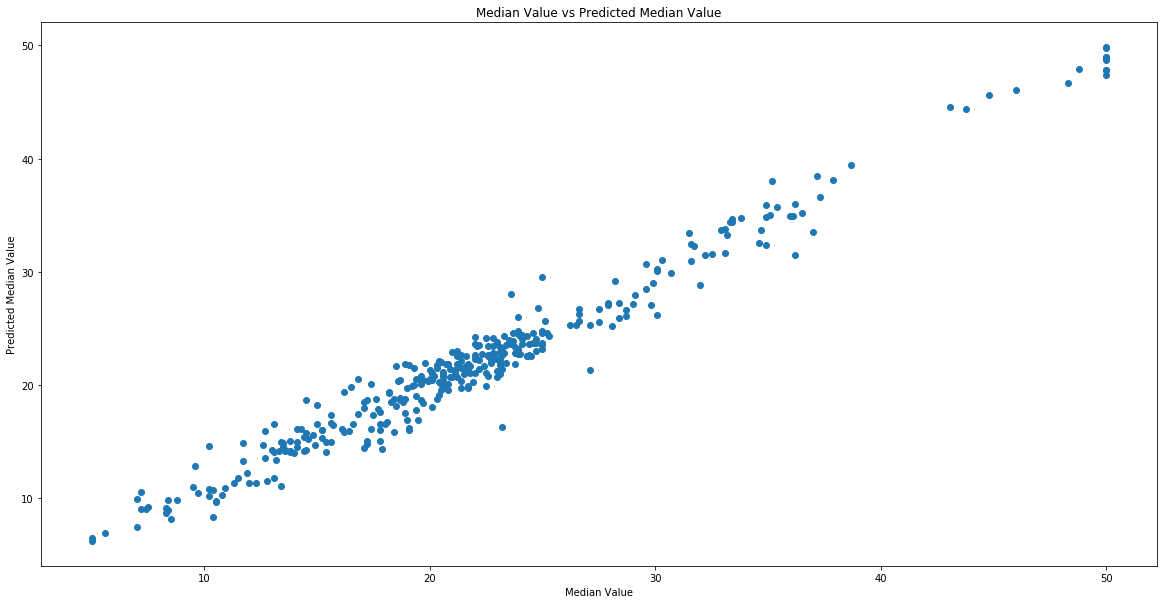

In [25]:
# Visualizing the differences between actual prices and predicted values
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)

plt.scatter(y_train, y_pred)
plt.xlabel("Median Value")
plt.ylabel("Predicted Median Value")
plt.title("Median Value vs Predicted Median Value")
plt.savefig('Plot5.png')
plt.show()

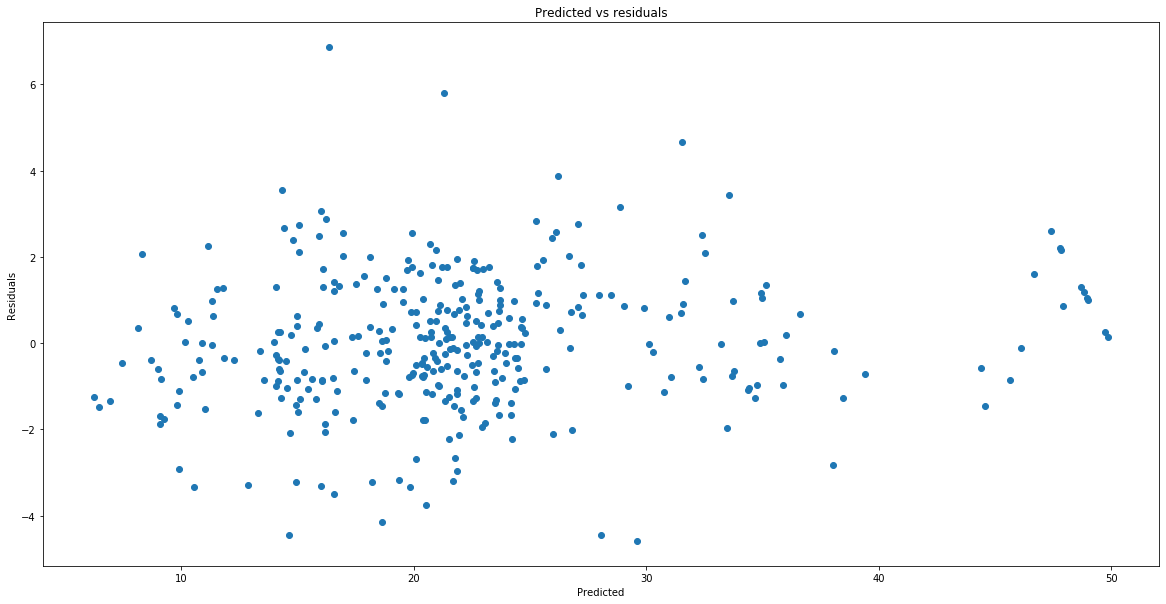

In [26]:
# Checking residuals
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.savefig('Plot6.png')
plt.show()

In [27]:
#Predicting Test data with the model
y_test_pred = reg.predict(x_test)

In [28]:
# Model Evaluation
acc_xgb = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_xgb)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.8435567674995906
Adjusted R^2: 0.8300508769240157
MAE: 2.4693663961008974
MSE: 16.335813645699943
RMSE: 4.041758731752792


In [29]:
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree Regressor', 'XGBoost'],
    'R-squared Score': [acc_linreg*100, acc_dtr*100, acc_xgb*100]})
models.sort_values(by='R-squared Score', ascending=False)

,Model,R-squared Score
2,XGBoost,84.355677
0,Linear Regression,70.731182
1,Decision Tree Regressor,70.731182
